In [6]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as LogNorm
import matplotlib.ticker as ticker
import math

tfile_hist = '../histograms/analysis_note/rho_weights.root'

typ = ["all", "both_acc", "p_acc_m_good", "m_acc_p_good", "acc_bad", "good_bad", "no_acc"]

colorList = ['r','b','g','m','c','gold','grey']

In [7]:
def make_plot( ax, h, color, num, var): 


    values = h.values()		
    errors = h.errors()
    #values = values/np.sum(values)
    values[values <= 0 ] = 0#np.nan

    xEdges = h.axis().edges()
    binCenters = (xEdges[:-1]+xEdges[1:])/2

    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4)



    ax.plot( binCenters, values, color=color,  label= f'{num} < '+var+ f' < {num + 1} [GeV]',drawstyle='steps-mid', linewidth=1)
    ax.legend()

    return 

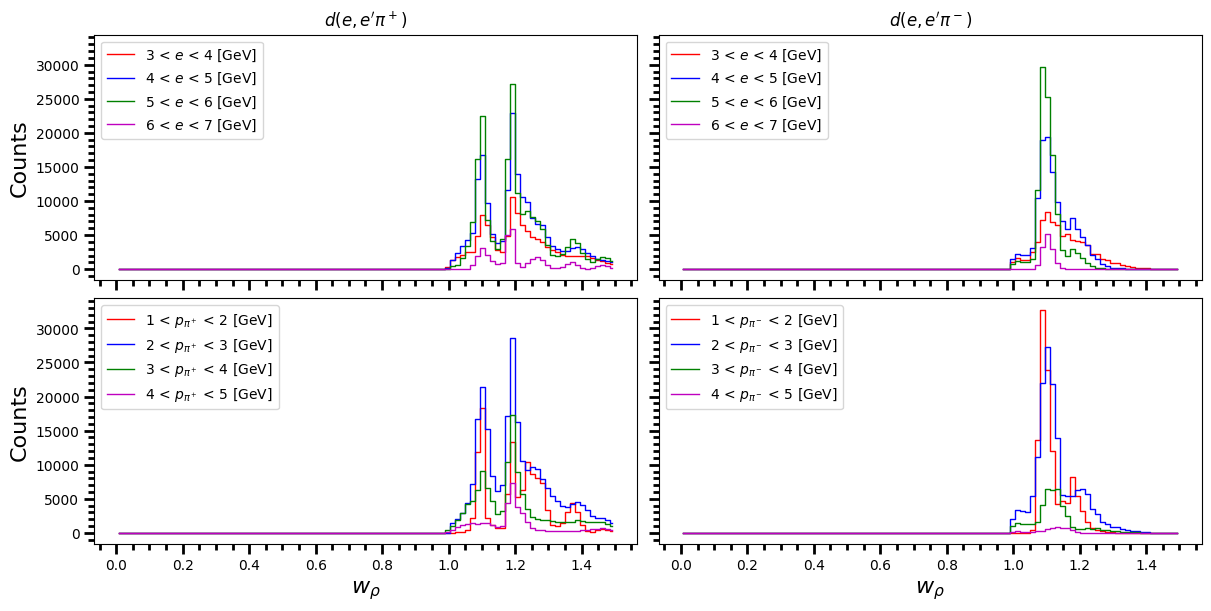

In [9]:
inFile = uproot.open(tfile_hist) 
ind = 0

hists_pip = [f'hWeights_pi_'+typ[ind]+f'_pip_{p};1' for p in range(1, 5)]
hists_pim = [f'hWeights_pi_'+typ[ind]+f'_pim_{p};1' for p in range(1, 5)]
hists_e_pip = [f'hWeights_e_'+typ[ind]+f'_pip_{p};1' for p in range(3, 7)]
hists_e_pim = [f'hWeights_e_'+typ[ind]+f'_pim_{p};1' for p in range(3, 7)]

fig, axs = plt.subplots(2, 2, figsize=(12,6), layout='constrained', sharex=True, sharey=True)

for p in range(len(hists_e_pip)):
    hist_pip = inFile[ hists_e_pip[p] ]
    make_plot( axs[0,0], hist_pip, colorList[p], p+3 , r'$e$') 
    hist_pim = inFile[ hists_e_pim[p] ]
    make_plot( axs[0,1], hist_pim, colorList[p], p+3 , r'$e$') 

for p in range(len(hists_pip)):

    hist_pip = inFile[ hists_pip[p] ]
    make_plot( axs[1,0], hist_pip, colorList[p], p+1 , r'$p_{\pi^+}$') 
    hist_pim = inFile[ hists_pim[p] ]
    make_plot( axs[1,1], hist_pim, colorList[p], p+1 , r'$p_{\pi^-}$') 

axs[0,0].set_title(r'$d(e,e^{\prime}\pi^+)$')
axs[0,1].set_title(r'$d(e,e^{\prime}\pi^-)$')

for ax in axs.flat:
    ax.set_xlabel(r'$w_{\rho}$', fontsize=16 )
    ax.set_ylabel( 'Counts', fontsize=16)
    ax.label_outer()

	#ax.set_ylim( [yMin, yMax] )
	#ax.set_xlim( [0.3, 1] )
fig.savefig("/volatile/clas12/users/jphelan/SIDIS/analysis_note/rho_studies/weight_values.pdf")